In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv("train.csv")

In [110]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


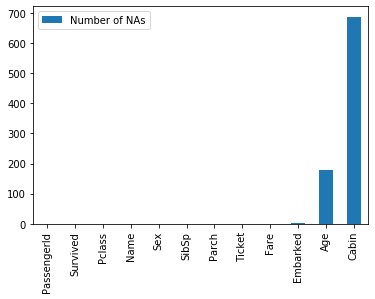

In [113]:
pd.DataFrame(df.isnull().sum(),columns=["Number of NAs"]).sort_values("Number of NAs").plot.bar()

In [114]:
df.dropna(subset=['Age'], inplace=True)

Text(0.5, 0, 'Age')

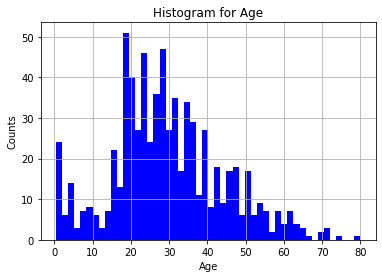

In [115]:
df["Age"].plot.hist(grid=True, bins=50, rwidth=1,color="b")
plt.title("Histogram for Age")
plt.ylabel("Counts")
plt.xlabel("Age")

In [116]:
df['Age_bins'] = pd.cut(x=df['Age'], bins=[0,9, 19,29, 39, 49,59,69,79,89,99],labels=['0s','10s','20s', '30s', '40s','50s','60s','70s', '80s', '90s'])

In [117]:
df2 = pd.DataFrame(df, columns = ['Survived', 'Age_bins','Sex'])

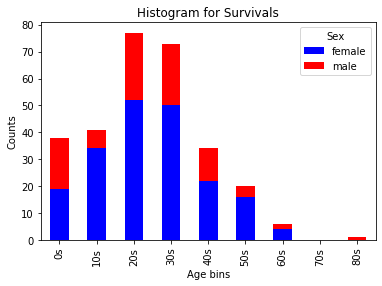

In [120]:
var=df2.groupby(["Age_bins","Sex"]).Survived.sum()
var.unstack().plot(kind="bar",stacked=True, color=["blue","red"])
plt.title("Histogram for Survivals")
plt.ylabel("Counts")
plt.xlabel("Age bins")
plt.show()